## Cargar Datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
# Load datos
path_datos = os.path.join('Datos','Originales')
filename = os.path.join(path_datos,'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'
#print(df.head())

## Libere Graficos

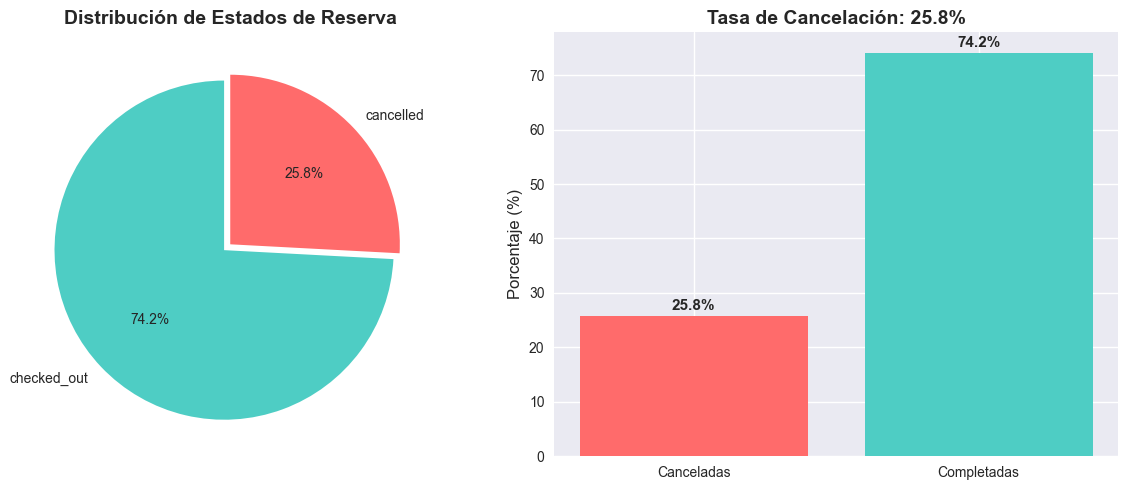

In [4]:
# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
path_datos = os.path.join('Datos','Originales')
filename = os.path.join(path_datos,'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'

# GRÁFICO 1: Distribución de Cancelaciones vs Checked-out
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart
status_counts = df['status'].value_counts()
colors = ['#4ecdc4', '#ff6b6b']  # Verde para checked_out, Rojo para cancelled
axes[0].pie(status_counts.values, labels=status_counts.index, 
            autopct='%1.1f%%', colors=colors, startangle=90, explode=[0.05, 0])
axes[0].set_title('Distribución de Estados de Reserva', fontsize=14, fontweight='bold')

# Bar chart con porcentajes
cancel_rate = (df['is_cancelled'].sum() / len(df)) * 100
checked_rate = 100 - cancel_rate

rates = [cancel_rate, checked_rate]
labels = ['Canceladas', 'Completadas']
bars = axes[1].bar(labels, rates, color=['#ff6b6b', '#4ecdc4'])

axes[1].set_ylabel('Porcentaje (%)', fontsize=12)
axes[1].set_title(f'Tasa de Cancelación: {cancel_rate:.1f}%', fontsize=14, fontweight='bold')

# Añadir valores en las barras
for bar, rate in zip(bars, rates):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{rate:.1f}%', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

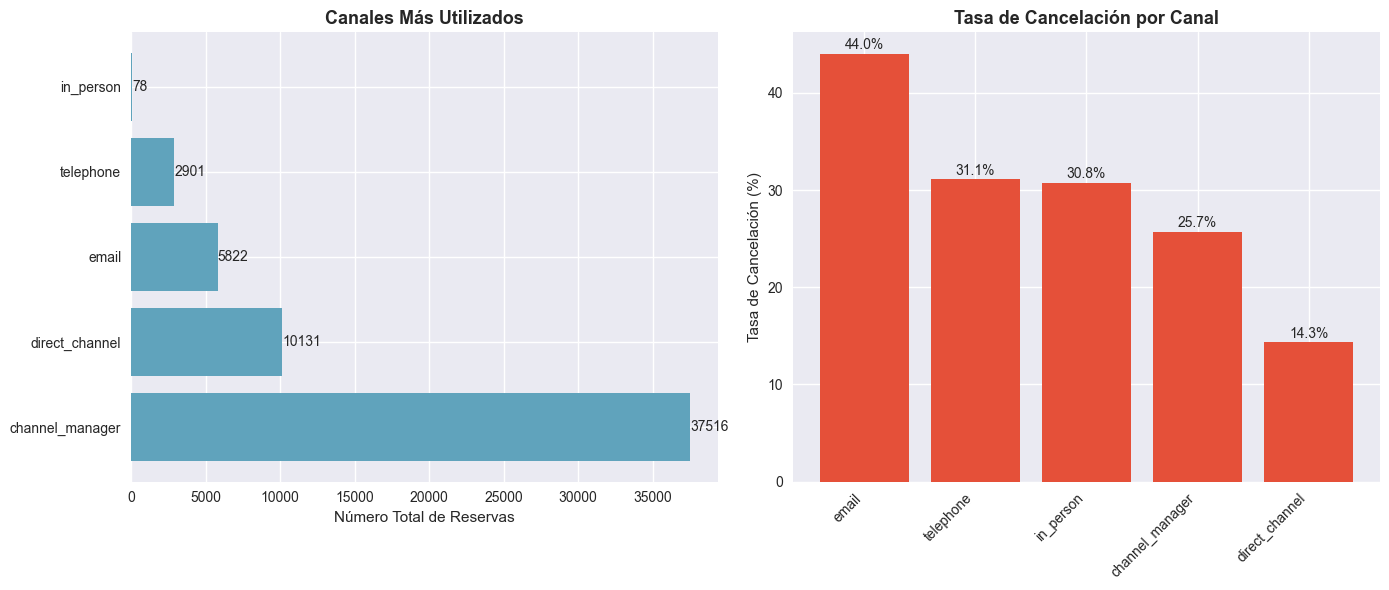

In [6]:
# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
path_datos = os.path.join('Datos','Originales')
filename = os.path.join(path_datos,'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'

# GRÁFICO 3: Cancelación por Canal de Reserva
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

if 'origin' in df.columns:
    # 1. Top canales por volumen
    top_channels = df['origin'].value_counts().head(8)
    axes[0].barh(range(len(top_channels)), top_channels.values, color='#60a3bc')
    axes[0].set_yticks(range(len(top_channels)))
    axes[0].set_yticklabels(top_channels.index)
    axes[0].set_xlabel('Número Total de Reservas', fontsize=11)
    axes[0].set_title('Canales Más Utilizados', fontsize=13, fontweight='bold')
    
    for i, v in enumerate(top_channels.values):
        axes[0].text(v + 0.5, i, str(v), va='center', fontsize=10)
    
    # 2. Tasa de cancelación por canal
    cancel_by_channel = df.groupby('origin')['is_cancelled'].mean() * 100
    cancel_by_channel = cancel_by_channel.sort_values(ascending=False).head(8)
    
    bars = axes[1].bar(range(len(cancel_by_channel)), cancel_by_channel.values, color='#e55039')
    axes[1].set_xticks(range(len(cancel_by_channel)))
    axes[1].set_xticklabels(cancel_by_channel.index, rotation=45, ha='right', fontsize=10)
    axes[1].set_ylabel('Tasa de Cancelación (%)', fontsize=11)
    axes[1].set_title('Tasa de Cancelación por Canal', fontsize=13, fontweight='bold')
    
    for i, v in enumerate(cancel_by_channel.values):
        axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

ESTADÍSTICAS DE RAZONES DE CANCELACIÓN
Total de cancelaciones: 14588
Cancelaciones con 'refuse_to_detail': 9040 (62.0%)
Cancelaciones analizadas (sin 'refuse_to_detail'): 5548

Distribución de razones (excluyendo 'refuse_to_detail'):
  • series_group_cancelled: 1417 (25.5%)
  • payment_missed: 1395 (25.1%)
  • no_show: 732 (13.2%)
  • changed_plans: 664 (12.0%)
  • other: 575 (10.4%)
  • duplicated: 142 (2.6%)
  • technical_error: 127 (2.3%)
  • force_majeure: 115 (2.1%)
  • mistake: 100 (1.8%)
  • found_better_location: 84 (1.5%)


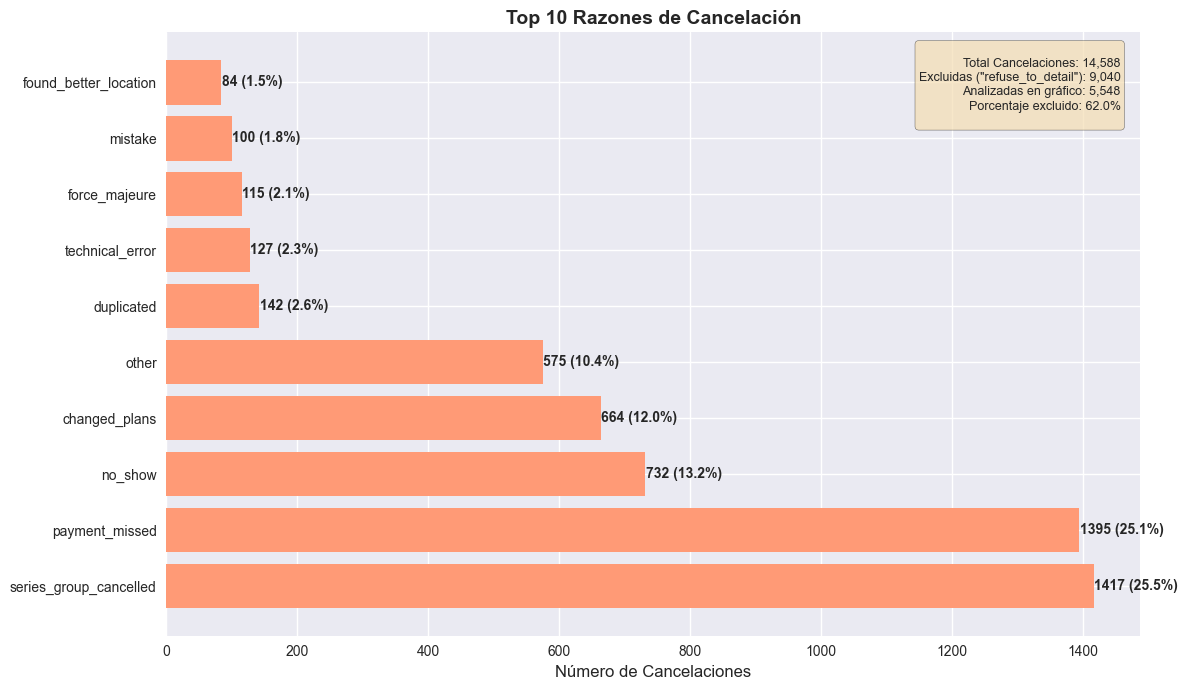

In [24]:
# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
path_datos = os.path.join('Datos','Originales')
filename = os.path.join(path_datos,'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'

# Filtrar solo cancelaciones
cancelled_df = df[df['is_cancelled'] == True]

# GRÁFICO 2: Razones de Cancelación (excluyendo refuse_to_detail)
plt.figure(figsize=(12, 7))

if 'cancellation_reason' in cancelled_df.columns and not cancelled_df.empty:
    # Excluir 'refuse_to_detail' del análisis
    cancelled_filtered = cancelled_df[cancelled_df['cancellation_reason'] != 'refuse_to_detail']
    
    if not cancelled_filtered.empty:
        # Contar razones (excluyendo refuse_to_detail)
        reason_counts = cancelled_filtered['cancellation_reason'].value_counts()
        
        # Tomar top 10 (o menos si hay menos razones)
        top_n = min(10, len(reason_counts))
        reason_counts = reason_counts.head(top_n)
        
        # Crear gráfico de barras horizontales
        bars = plt.barh(range(len(reason_counts)), reason_counts.values, color='#ff9a76')
        plt.yticks(range(len(reason_counts)), reason_counts.index)
        plt.xlabel('Número de Cancelaciones', fontsize=12)
        plt.title(f'Top {top_n} Razones de Cancelación', 
                  fontsize=14, fontweight='bold')
        
        # Añadir valores en las barras
        for i, (bar, count) in enumerate(zip(bars, reason_counts.values)):
            percentage = (count / len(cancelled_filtered)) * 100
            plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                    f'{count} ({percentage:.1f}%)',
                    va='center', fontsize=10, fontweight='bold')
        
        # Estadísticas - MOVIDO A LA DERECHA
        total_cancelled = len(cancelled_df)
        total_refused = (cancelled_df['cancellation_reason'] == 'refuse_to_detail').sum()
        total_filtered = len(cancelled_filtered)
        
        stats_text = f'''
Total Cancelaciones: {total_cancelled:,}
Excluidas ("refuse_to_detail"): {total_refused:,}
Analizadas en gráfico: {total_filtered:,}
Porcentaje excluido: {(total_refused/total_cancelled*100):.1f}%
        '''
        
        # Mover a la parte derecha superior (coordenadas 0.98, 0.98 significa 98% a la derecha, 98% arriba)
        plt.text(0.98, 0.98, stats_text,
                 transform=plt.gca().transAxes, fontsize=9,
                 verticalalignment='top',
                 horizontalalignment='right',  # Alineado a la derecha
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
        
        # También mostrar en consola
        print("="*60)
        print("ESTADÍSTICAS DE RAZONES DE CANCELACIÓN")
        print("="*60)
        print(f"Total de cancelaciones: {total_cancelled}")
        print(f"Cancelaciones con 'refuse_to_detail': {total_refused} ({(total_refused/total_cancelled*100):.1f}%)")
        print(f"Cancelaciones analizadas (sin 'refuse_to_detail'): {total_filtered}")
        print("\nDistribución de razones (excluyendo 'refuse_to_detail'):")
        for reason, count in reason_counts.items():
            percentage = (count / total_filtered) * 100
            print(f"  • {reason}: {count} ({percentage:.1f}%)")
    
    else:
        print("⚠️ No hay datos de razones de cancelación después de excluir 'refuse_to_detail'")
        
        # Mostrar distribución original para referencia
        if 'cancellation_reason' in cancelled_df.columns:
            print("\nDistribución original (incluyendo 'refuse_to_detail'):")
            original_counts = cancelled_df['cancellation_reason'].value_counts()
            for reason, count in original_counts.head(10).items():
                percentage = (count / len(cancelled_df)) * 100
                print(f"  • {reason}: {count} ({percentage:.1f}%)")
            
            # Crear gráfico con todas las razones (incluyendo refuse_to_detail)
            original_counts_top = original_counts.head(10)
            bars = plt.barh(range(len(original_counts_top)), original_counts_top.values, color='#ff9a76')
            plt.yticks(range(len(original_counts_top)), original_counts_top.index)
            plt.xlabel('Número de Cancelaciones', fontsize=12)
            plt.title('Top 10 Razones de Cancelación (todas)', fontsize=14, fontweight='bold')
            
            for i, (bar, count) in enumerate(zip(bars, original_counts_top.values)):
                percentage = (count / len(cancelled_df)) * 100
                plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                        f'{count} ({percentage:.1f}%)',
                        va='center', fontsize=10)
            
            # Marcar refuse_to_detail en rojo si está presente
            if 'refuse_to_detail' in original_counts_top.index:
                idx = list(original_counts_top.index).index('refuse_to_detail')
                bars[idx].set_color('#ff0000')
                bars[idx].set_alpha(0.8)
                
                # Texto movido a la derecha
                plt.text(0.98, 0.98, "⚠️ 'refuse_to_detail' marcado en rojo",
                         transform=plt.gca().transAxes, fontsize=10,
                         verticalalignment='top',
                         horizontalalignment='right',
                         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
else:
    print("⚠️ No hay datos de razones de cancelación disponibles")

plt.tight_layout()
plt.show()

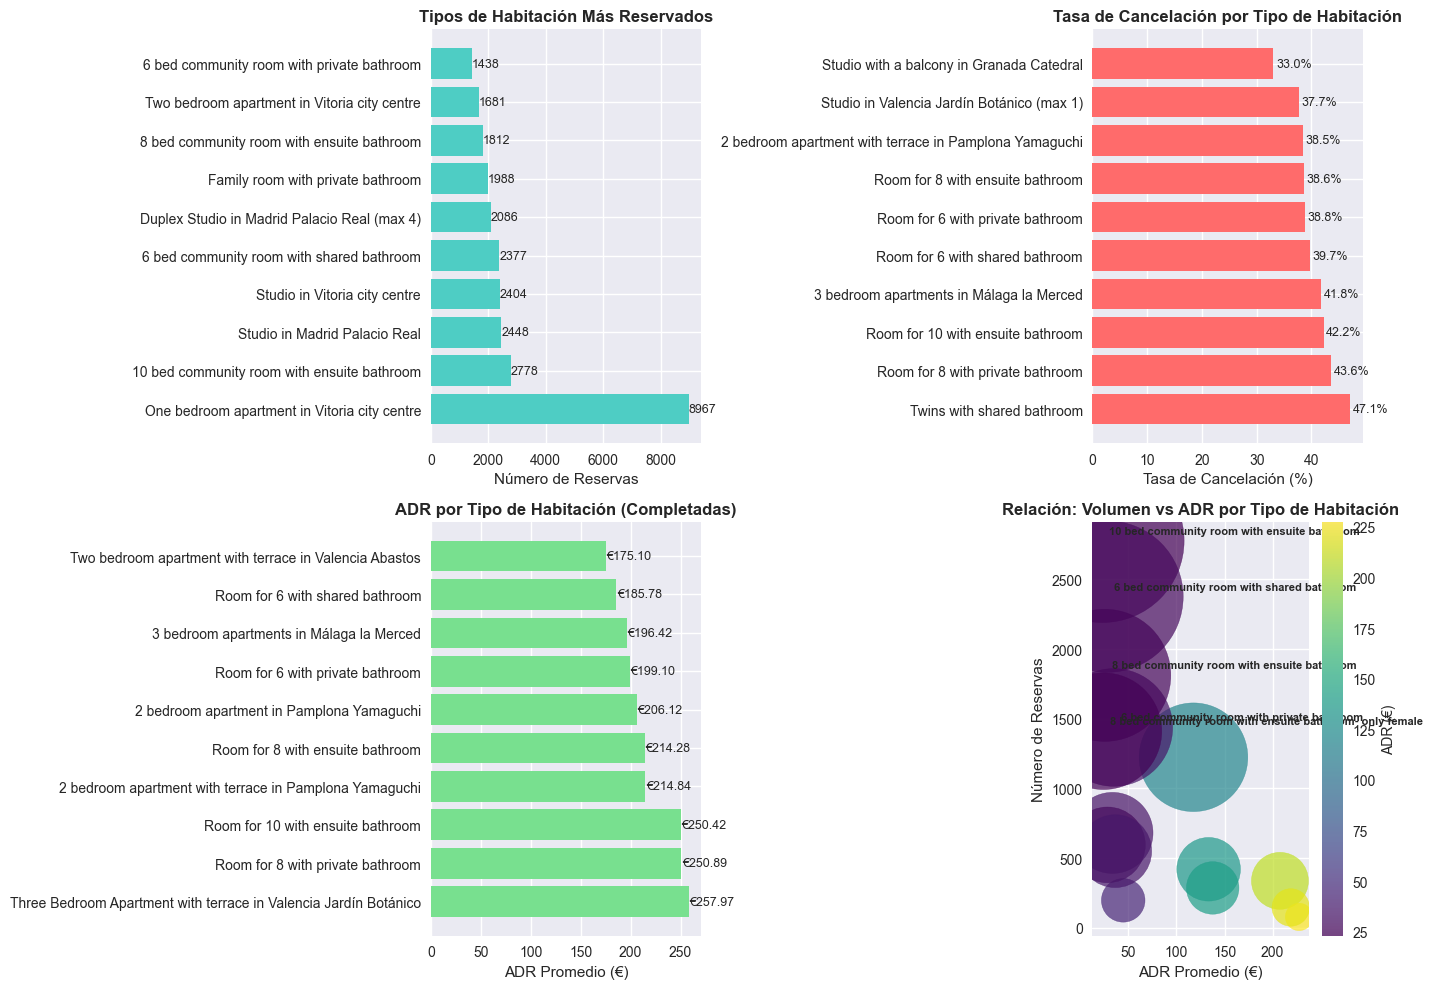

In [7]:
# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
path_datos = os.path.join('Datos','Originales')
filename = os.path.join(path_datos,'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'

# Convertir ADR a numérico
df['total_adr'] = pd.to_numeric(df['total_adr'], errors='coerce')

# GRÁFICO 5: Tipos de Habitación y ADR
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

if 'requested_category_name' in df.columns:
    # 1. Tipos más reservados
    room_counts = df['requested_category_name'].value_counts().head(10)
    
    axes[0,0].barh(range(len(room_counts)), room_counts.values, color='#4ecdc4')
    axes[0,0].set_yticks(range(len(room_counts)))
    axes[0,0].set_yticklabels(room_counts.index)
    axes[0,0].set_xlabel('Número de Reservas', fontsize=11)
    axes[0,0].set_title('Tipos de Habitación Más Reservados', fontsize=12, fontweight='bold')
    
    for i, v in enumerate(room_counts.values):
        axes[0,0].text(v + 0.5, i, str(v), va='center', fontsize=9)
    
    # 2. Tasa de cancelación por tipo
    cancel_by_room = df.groupby('requested_category_name')['is_cancelled'].mean() * 100
    cancel_by_room = cancel_by_room.sort_values(ascending=False).head(10)
    
    axes[0,1].barh(range(len(cancel_by_room)), cancel_by_room.values, color='#ff6b6b')
    axes[0,1].set_yticks(range(len(cancel_by_room)))
    axes[0,1].set_yticklabels(cancel_by_room.index)
    axes[0,1].set_xlabel('Tasa de Cancelación (%)', fontsize=11)
    axes[0,1].set_title('Tasa de Cancelación por Tipo de Habitación', fontsize=12, fontweight='bold')
    
    for i, v in enumerate(cancel_by_room.values):
        axes[0,1].text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9)
    
    # 3. ADR promedio por tipo
    if 'total_adr' in df.columns:
        completed_df = df[df['is_cancelled'] == False]
        if not completed_df.empty:
            adr_by_room = completed_df.groupby('requested_category_name')['total_adr'].mean()
            adr_by_room = adr_by_room.sort_values(ascending=False).head(10)
            
            axes[1,0].barh(range(len(adr_by_room)), adr_by_room.values, color='#78e08f')
            axes[1,0].set_yticks(range(len(adr_by_room)))
            axes[1,0].set_yticklabels(adr_by_room.index)
            axes[1,0].set_xlabel('ADR Promedio (€)', fontsize=11)
            axes[1,0].set_title('ADR por Tipo de Habitación (Completadas)', fontsize=12, fontweight='bold')
            
            for i, v in enumerate(adr_by_room.values):
                axes[1,0].text(v + 0.5, i, f'€{v:.2f}', va='center', fontsize=9)
    
    # 4. Volumen vs ADR (bubble chart)
    if 'total_adr' in df.columns:
        room_stats = df.groupby('requested_category_name').agg({
            'is_cancelled': 'count',
            'total_adr': 'mean'
        }).rename(columns={'is_cancelled': 'count', 'total_adr': 'avg_adr'})
        
        # Filtrar para tener mejor visualización
        room_stats = room_stats[room_stats['count'] > 5].head(15)
        
        scatter = axes[1,1].scatter(room_stats['avg_adr'], room_stats['count'],
                                   s=room_stats['count']*5,  # Tamaño por volumen
                                   c=room_stats['avg_adr'],  # Color por ADR
                                   cmap='viridis', alpha=0.7)
        
        axes[1,1].set_xlabel('ADR Promedio (€)', fontsize=11)
        axes[1,1].set_ylabel('Número de Reservas', fontsize=11)
        axes[1,1].set_title('Relación: Volumen vs ADR por Tipo de Habitación', 
                           fontsize=12, fontweight='bold')
        
        # Añadir etiquetas para los puntos más grandes
        for idx, row in room_stats.iterrows():
            if row['count'] > room_stats['count'].quantile(0.7):  # Etiquetar solo los más grandes
                axes[1,1].annotate(idx, (row['avg_adr'], row['count']),
                                 xytext=(5, 5), textcoords='offset points',
                                 fontsize=8, fontweight='bold')
        
        # Barra de color
        cbar = plt.colorbar(scatter, ax=axes[1,1])
        cbar.set_label('ADR (€)', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\Umiak\AppData\Local\Temp\ipykernel_5240\1139427489.py:201: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


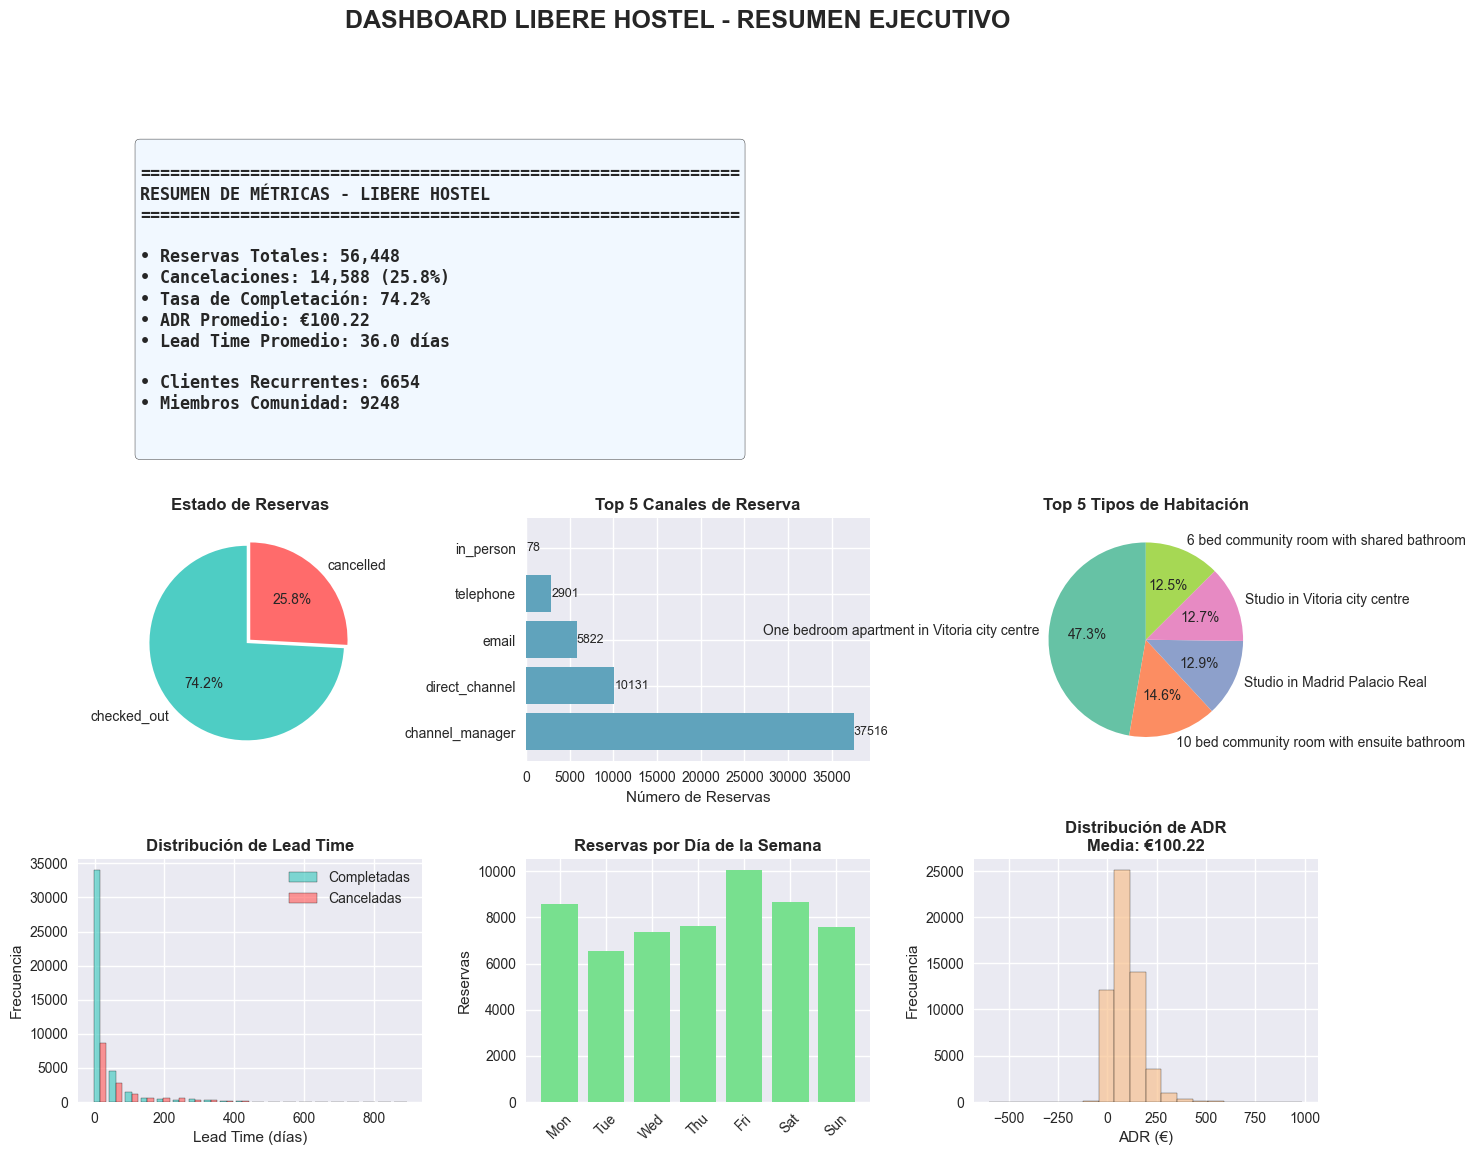

INFORMACIÓN ADICIONAL DEL DATASET
Columnas disponibles: ['booked_at', 'checkin_time', 'checkout_time', 'lead_time', 'lenght_of_stay', 'checkin_month', 'checkin_day', 'adult_count', 'child_count', 'origin', 'travel_agency_name', 'requested_category', 'requested_category_name', 'asset', 'asset_type', 'brand', 'asset_opening_date', 'available_units', 'business_segment', 'rate', 'rate_group_name', 'rate_type', 'completed_entry_forms_count', 'all_entry_forms_completed', 'last_entry_form_completed_at', 'returning_inhabitant', 'recurrence', 'libere_community', 'bought_products', 'product_count', 'reservation_net_value', 'total_adr', 'status', 'cancelled_at', 'cancellation_reason', 'cancellation_lead_time', 'is_cancelled', 'lead_time_numeric']
Tipos de datos:
booked_at                        object
checkin_time                     object
checkout_time                    object
lead_time                         int64
lenght_of_stay                    int64
checkin_month                    objec

In [8]:
# Configuración
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Cargar datos
path_datos = os.path.join('Datos','Originales')
filename = os.path.join(path_datos,'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'

# Convertir columnas numéricas si existen
if 'total_adr' in df.columns:
    df['total_adr'] = pd.to_numeric(df['total_adr'], errors='coerce')

if 'lead_time' in df.columns:
    df['lead_time'] = pd.to_numeric(df['lead_time'], errors='coerce')

# GRÁFICO 6: Dashboard Resumen
fig = plt.figure(figsize=(16, 12))
fig.suptitle('DASHBOARD LIBERE HOSTEL - RESUMEN EJECUTIVO', 
             fontsize=18, fontweight='bold', y=1.02)

# Layout usando GridSpec
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

# ========== PANEL SUPERIOR: MÉTRICAS CLAVE ==========
ax1 = fig.add_subplot(gs[0, :])
ax1.axis('off')

# Calcular métricas
total_reservas = len(df)
cancelaciones = df['is_cancelled'].sum()
tasa_cancelacion = (cancelaciones / total_reservas) * 100
tasa_completacion = 100 - tasa_cancelacion

# ADR promedio - manejar posibles valores no numéricos
if 'total_adr' in df.columns:
    # Filtrar solo valores numéricos válidos
    adr_valores = pd.to_numeric(df['total_adr'], errors='coerce')
    adr_promedio = adr_valores.mean()
    if pd.isna(adr_promedio):
        adr_promedio = 0
        adr_texto = "€0.00 (datos no disponibles)"
    else:
        adr_texto = f"€{adr_promedio:.2f}"
else:
    adr_promedio = 0
    adr_texto = "€0.00 (columna no encontrada)"

# Lead time promedio - manejar posibles valores no numéricos
if 'lead_time' in df.columns:
    lead_valores = pd.to_numeric(df['lead_time'], errors='coerce')
    lead_promedio = lead_valores.mean()
    if pd.isna(lead_promedio):
        lead_promedio = 0
        lead_texto = "0.0 días (datos no disponibles)"
    else:
        lead_texto = f"{lead_promedio:.1f} días"
else:
    lead_promedio = 0
    lead_texto = "0.0 días (columna no encontrada)"

# Crear texto con métricas
metricas_texto = f'''
{'='*60}
RESUMEN DE MÉTRICAS - LIBERE HOSTEL
{'='*60}

• Reservas Totales: {total_reservas:,}
• Cancelaciones: {cancelaciones:,} ({tasa_cancelacion:.1f}%)
• Tasa de Completación: {tasa_completacion:.1f}%
• ADR Promedio: {adr_texto}
• Lead Time Promedio: {lead_texto}

• Clientes Recurrentes: {df['returning_inhabitant'].eq('yes').sum() if 'returning_inhabitant' in df.columns else 'N/A'}
• Miembros Comunidad: {df['libere_community'].eq('yes').sum() if 'libere_community' in df.columns else 'N/A'}

'''

ax1.text(0.05, 0.5, metricas_texto, fontsize=12, fontfamily='monospace',
         verticalalignment='center', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='#f0f8ff', alpha=0.9))

# ========== PANEL IZQUIERDO: DISTRIBUCIONES ==========
ax2 = fig.add_subplot(gs[1, 0])
# Distribución de estados
status_counts = df['status'].value_counts()
colors = ['#4ecdc4', '#ff6b6b']
ax2.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, explode=[0.05, 0])
ax2.set_title('Estado de Reservas', fontsize=12, fontweight='bold')

# ========== PANEL CENTRAL: CANALES ==========
ax3 = fig.add_subplot(gs[1, 1])
if 'origin' in df.columns:
    top_channels = df['origin'].value_counts().head(5)
    ax3.barh(range(len(top_channels)), top_channels.values, color='#60a3bc')
    ax3.set_yticks(range(len(top_channels)))
    ax3.set_yticklabels(top_channels.index)
    ax3.set_xlabel('Número de Reservas')
    ax3.set_title('Top 5 Canales de Reserva', fontsize=12, fontweight='bold')
    
    for i, v in enumerate(top_channels.values):
        ax3.text(v + 0.5, i, str(v), va='center', fontsize=9)
else:
    ax3.text(0.5, 0.5, 'Datos de origen\nno disponibles', 
             ha='center', va='center', transform=ax3.transAxes,
             fontsize=10, fontweight='bold')
    ax3.set_title('Canales de Reserva', fontsize=12, fontweight='bold')
    ax3.axis('off')

# ========== PANEL DERECHO: HABITACIONES ==========
ax4 = fig.add_subplot(gs[1, 2])
if 'requested_category_name' in df.columns:
    top_rooms = df['requested_category_name'].value_counts().head(5)
    colors_rooms = sns.color_palette("Set2", len(top_rooms))
    ax4.pie(top_rooms.values, labels=top_rooms.index, autopct='%1.1f%%',
            colors=colors_rooms, startangle=90)
    ax4.set_title('Top 5 Tipos de Habitación', fontsize=12, fontweight='bold')
else:
    ax4.text(0.5, 0.5, 'Datos de habitaciones\nno disponibles', 
             ha='center', va='center', transform=ax4.transAxes,
             fontsize=10, fontweight='bold')
    ax4.set_title('Tipos de Habitación', fontsize=12, fontweight='bold')
    ax4.axis('off')

# ========== PANEL INFERIOR IZQUIERDO: LEAD TIME ==========
ax5 = fig.add_subplot(gs[2, 0])
if 'lead_time' in df.columns:
    # Convertir a numérico y manejar valores faltantes
    df['lead_time_numeric'] = pd.to_numeric(df['lead_time'], errors='coerce')
    
    lead_cancel = df[df['is_cancelled']]['lead_time_numeric'].dropna()
    lead_complete = df[~df['is_cancelled']]['lead_time_numeric'].dropna()
    
    if len(lead_cancel) > 0 and len(lead_complete) > 0:
        ax5.hist([lead_complete, lead_cancel], bins=20, 
                 label=['Completadas', 'Canceladas'],
                 color=['#4ecdc4', '#ff6b6b'], alpha=0.7, edgecolor='black')
        ax5.set_xlabel('Lead Time (días)')
        ax5.set_ylabel('Frecuencia')
        ax5.set_title('Distribución de Lead Time', fontsize=12, fontweight='bold')
        ax5.legend()
    else:
        ax5.text(0.5, 0.5, 'Datos insuficientes\npara Lead Time', 
                 ha='center', va='center', transform=ax5.transAxes,
                 fontsize=10, fontweight='bold')
        ax5.set_title('Lead Time', fontsize=12, fontweight='bold')
        ax5.axis('off')
else:
    ax5.text(0.5, 0.5, 'Lead Time\nno disponible', 
             ha='center', va='center', transform=ax5.transAxes,
             fontsize=10, fontweight='bold')
    ax5.set_title('Lead Time', fontsize=12, fontweight='bold')
    ax5.axis('off')

# ========== PANEL INFERIOR CENTRAL: TEMPORAL ==========
ax6 = fig.add_subplot(gs[2, 1])
if 'checkin_day' in df.columns:
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = df['checkin_day'].value_counts().reindex(day_order, fill_value=0)
    
    ax6.bar(range(len(day_counts)), day_counts.values, color='#78e08f')
    ax6.set_xticks(range(len(day_counts)))
    ax6.set_xticklabels([d[:3] for d in day_counts.index], rotation=45)
    ax6.set_ylabel('Reservas')
    ax6.set_title('Reservas por Día de la Semana', fontsize=12, fontweight='bold')
else:
    ax6.text(0.5, 0.5, 'Datos temporales\nno disponibles', 
             ha='center', va='center', transform=ax6.transAxes,
             fontsize=10, fontweight='bold')
    ax6.set_title('Distribución Temporal', fontsize=12, fontweight='bold')
    ax6.axis('off')

# ========== PANEL INFERIOR DERECHO: ADR ==========
ax7 = fig.add_subplot(gs[2, 2])
if 'total_adr' in df.columns:
    # Convertir a numérico
    adr_data = pd.to_numeric(df['total_adr'], errors='coerce').dropna()
    
    if len(adr_data) > 0:
        ax7.hist(adr_data, bins=20, color='#f8c291', edgecolor='black', alpha=0.7)
        ax7.set_xlabel('ADR (€)')
        ax7.set_ylabel('Frecuencia')
        media_adr = adr_data.mean()
        ax7.set_title(f'Distribución de ADR\nMedia: €{media_adr:.2f}', 
                     fontsize=12, fontweight='bold')
    else:
        ax7.text(0.5, 0.5, 'Datos de ADR\nno disponibles', 
                 ha='center', va='center', transform=ax7.transAxes,
                 fontsize=10, fontweight='bold')
        ax7.set_title('Distribución de ADR', fontsize=12, fontweight='bold')
        ax7.axis('off')
else:
    ax7.text(0.5, 0.5, 'ADR\nno disponible', 
             ha='center', va='center', transform=ax7.transAxes,
             fontsize=10, fontweight='bold')
    ax7.set_title('Distribución de ADR', fontsize=12, fontweight='bold')
    ax7.axis('off')

plt.tight_layout()
plt.show()

# Mostrar información adicional en consola
print("="*60)
print("INFORMACIÓN ADICIONAL DEL DATASET")
print("="*60)
print(f"Columnas disponibles: {df.columns.tolist()}")
print(f"Tipos de datos:")
print(df.dtypes)
print("\nValores únicos en columnas clave:")

columnas_clave = ['status', 'origin', 'business_segment', 'rate_type', 'requested_category_name']
for col in columnas_clave:
    if col in df.columns:
        print(f"- {col}: {df[col].nunique()} valores únicos")

if 'total_adr' in df.columns:
    print(f"\nEstadísticas de ADR:")
    print(f"  Valores no numéricos: {df['total_adr'].apply(lambda x: not str(x).replace('.', '', 1).isdigit() if pd.notna(x) else False).sum()}")
    print(f"  Valores nulos: {df['total_adr'].isna().sum()}")

## Graficos Generales

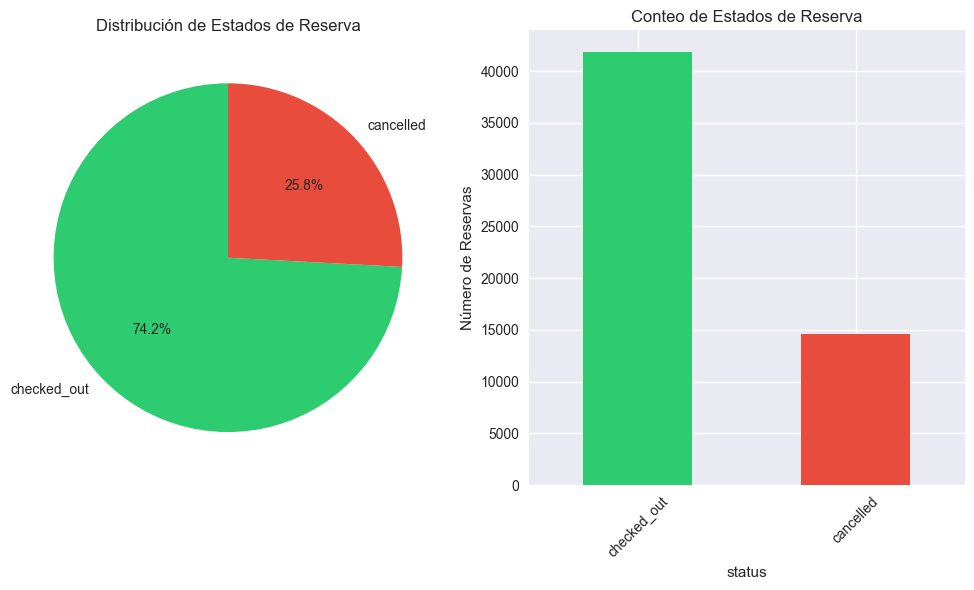

In [9]:
# Gráfico 1: Distribución de status
plt.figure(figsize=(10, 6))

status_counts = df['status'].value_counts()
colors = ['#2ecc71', '#e74c3c']  # Verde para checked_out, rojo para cancelled

plt.subplot(1, 2, 1)
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribución de Estados de Reserva')

plt.subplot(1, 2, 2)
status_counts.plot(kind='bar', color=colors)
plt.title('Conteo de Estados de Reserva')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

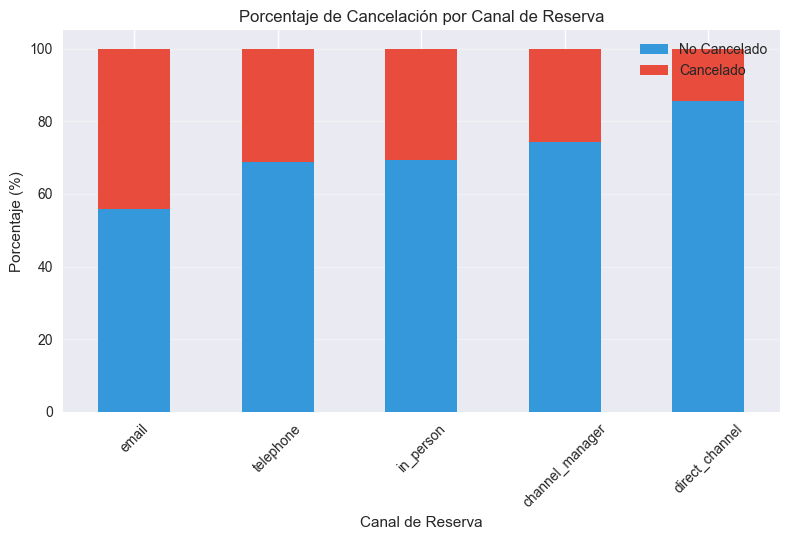


Tasas de cancelación por canal:
origin
email              44.039849
telephone          31.092727
in_person          30.769231
channel_manager    25.717027
direct_channel     14.312506
Name: True, dtype: float64


In [10]:
# Gráfico 2: Cancelación por canal
plt.figure(figsize=(12, 6))
cancel_by_origin = pd.crosstab(df['origin'], df['is_cancelled'], normalize='index') * 100

cancel_by_origin_sorted = cancel_by_origin.sort_values(by=True, ascending=False)
cancel_by_origin_sorted.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'])

plt.title('Porcentaje de Cancelación por Canal de Reserva')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Canal de Reserva')
plt.legend(['No Cancelado', 'Cancelado'], loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar tasas específicas
print("\nTasas de cancelación por canal:")
print(cancel_by_origin[True].sort_values(ascending=False))

<Figure size 1200x600 with 0 Axes>

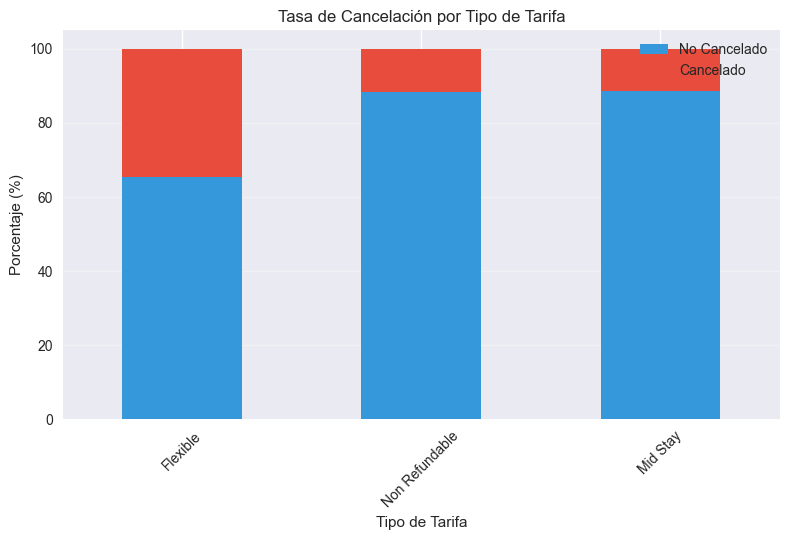

In [11]:
# Gráfico 3: Cancelación por tipo de tarifa
plt.figure(figsize=(12, 6))

cancel_by_rate = pd.crosstab(df['rate_type'], df['is_cancelled'], normalize='index') * 100
cancel_by_rate_sorted = cancel_by_rate.sort_values(by=True, ascending=False)

cancel_by_rate_sorted.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'])
plt.title('Tasa de Cancelación por Tipo de Tarifa')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Tipo de Tarifa')
plt.legend(['No Cancelado', 'Cancelado'])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

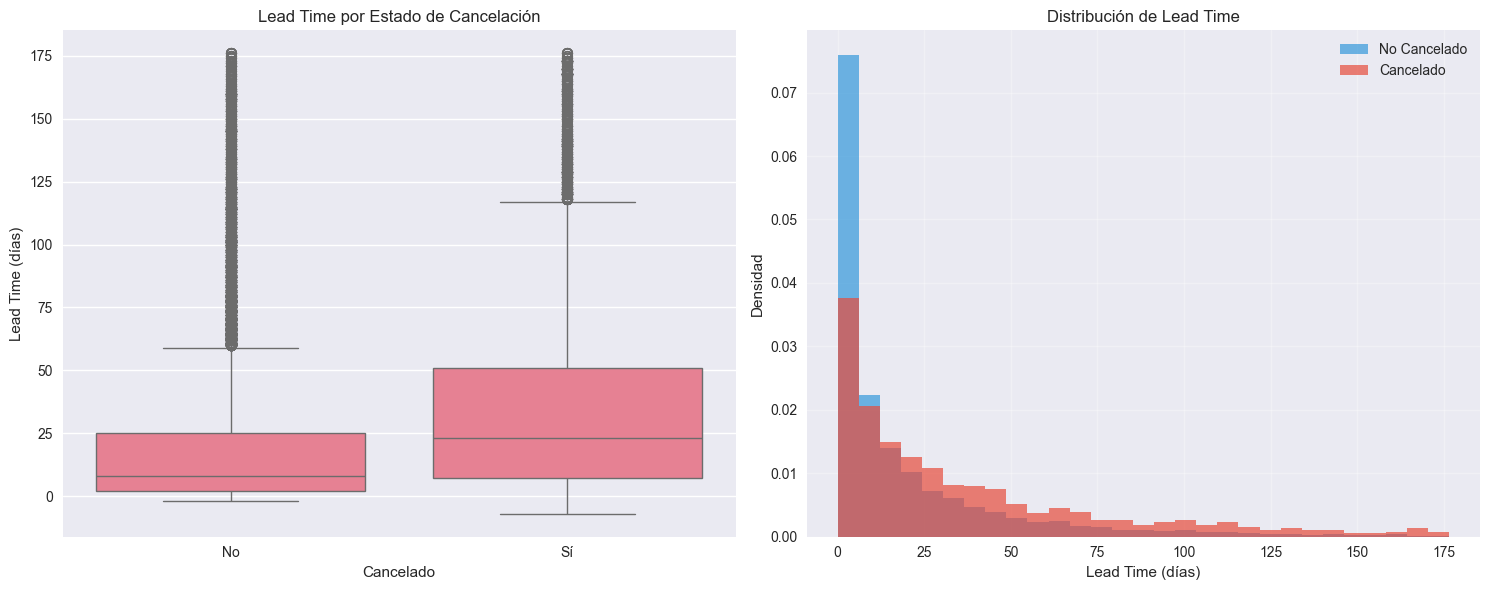

Lead time promedio - No cancelados: 27.5 días
Lead time promedio - Cancelados: 60.4 días


In [12]:
# Gráfico 4: Lead Time vs Cancelación
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
# Boxplot
df_box = df[df['lead_time'] <= df['lead_time'].quantile(0.95)]  # Remover outliers extremos
sns.boxplot(x='is_cancelled', y='lead_time', data=df_box)
plt.title('Lead Time por Estado de Cancelación')
plt.xlabel('Cancelado')
plt.ylabel('Lead Time (días)')
plt.xticks([0, 1], ['No', 'Sí'])

plt.subplot(1, 2, 2)
# Histograma comparativo
max_lead = min(df['lead_time'].quantile(0.95), 200)  # Limitar para mejor visualización
bins = np.linspace(0, max_lead, 30)

plt.hist(df[df['is_cancelled'] == False]['lead_time'], bins=bins, alpha=0.7, 
         label='No Cancelado', color='#3498db', density=True)
plt.hist(df[df['is_cancelled'] == True]['lead_time'], bins=bins, alpha=0.7, 
         label='Cancelado', color='#e74c3c', density=True)
plt.xlabel('Lead Time (días)')
plt.ylabel('Densidad')
plt.legend()
plt.title('Distribución de Lead Time')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas
print(f"Lead time promedio - No cancelados: {df[df['is_cancelled'] == False]['lead_time'].mean():.1f} días")
print(f"Lead time promedio - Cancelados: {df[df['is_cancelled'] == True]['lead_time'].mean():.1f} días")

C:\Users\Umiak\AppData\Local\Temp\ipykernel_5240\4271756240.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stay_cancel_rate = df.groupby(stay_bins)['is_cancelled'].mean() * 100


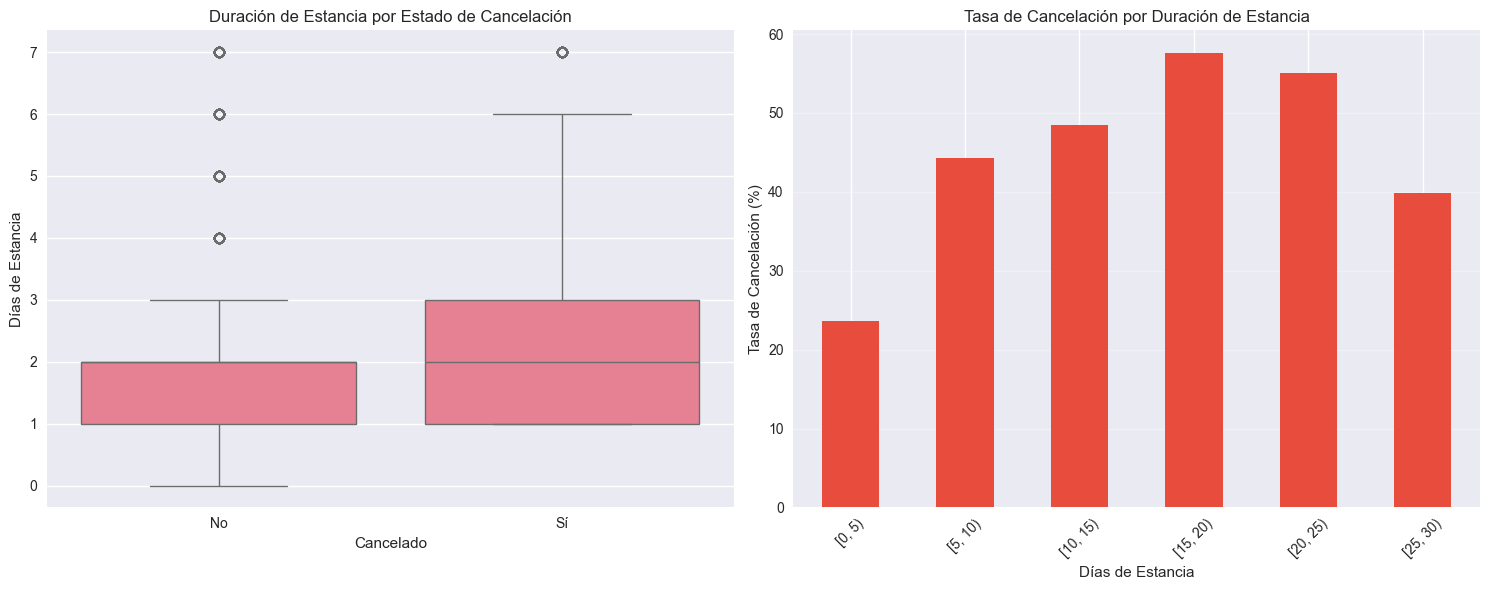

In [13]:
# Gráfico 5: Duración de estancia vs cancelación
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
# Boxplot (limitando outliers)
df_stay = df[df['lenght_of_stay'] <= df['lenght_of_stay'].quantile(0.95)]
sns.boxplot(x='is_cancelled', y='lenght_of_stay', data=df_stay)
plt.title('Duración de Estancia por Estado de Cancelación')
plt.xlabel('Cancelado')
plt.ylabel('Días de Estancia')
plt.xticks([0, 1], ['No', 'Sí'])

plt.subplot(1, 2, 2)
# Tasa de cancelación por duración
stay_bins = pd.cut(df['lenght_of_stay'], bins=range(0, 31, 5), right=False)
stay_cancel_rate = df.groupby(stay_bins)['is_cancelled'].mean() * 100

stay_cancel_rate.plot(kind='bar', color='#e74c3c')
plt.title('Tasa de Cancelación por Duración de Estancia')
plt.xlabel('Días de Estancia')
plt.ylabel('Tasa de Cancelación (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

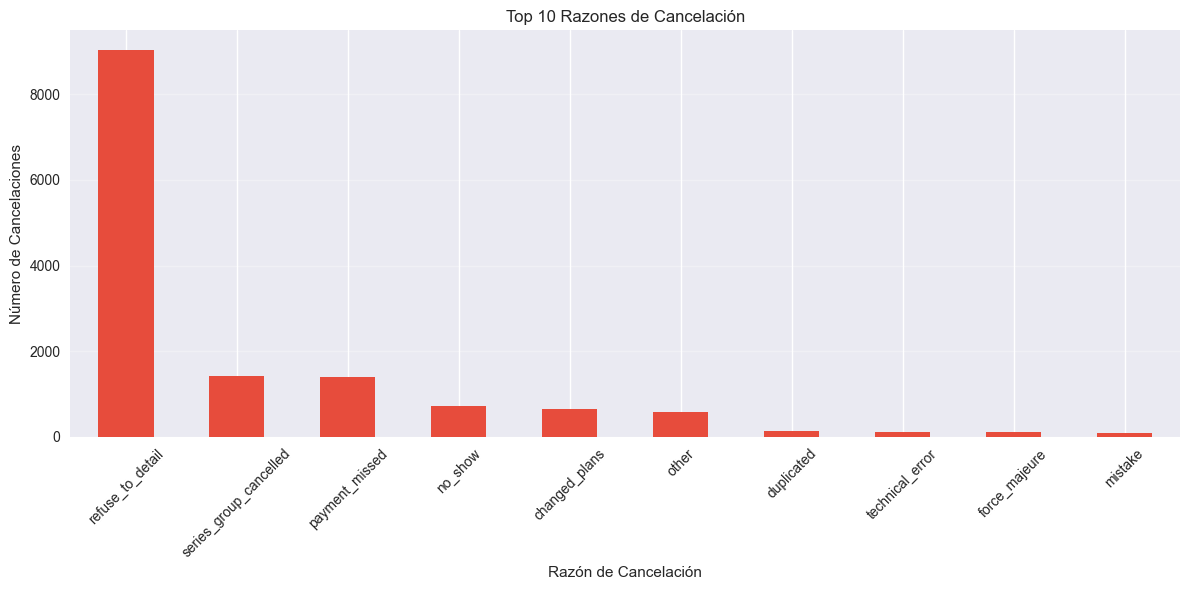

Razón más común: refuse_to_detail (9040 cancelaciones)


In [14]:
# Gráfico 6: Razones de cancelación (solo cancelados)
cancelled_df = df[df['is_cancelled'] == True]

plt.figure(figsize=(12, 6))
reason_counts = cancelled_df['cancellation_reason'].value_counts()

# Si hay muchos valores, mostramos solo los top N
if len(reason_counts) > 10:
    top_reasons = reason_counts.head(10)
    top_reasons.plot(kind='bar', color='#e74c3c')
    plt.title('Top 10 Razones de Cancelación')
else:
    reason_counts.plot(kind='bar', color='#e74c3c')
    plt.title('Razones de Cancelación')

plt.ylabel('Número de Cancelaciones')
plt.xlabel('Razón de Cancelación')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Razón más común: {reason_counts.index[0]} ({reason_counts.iloc[0]} cancelaciones)")

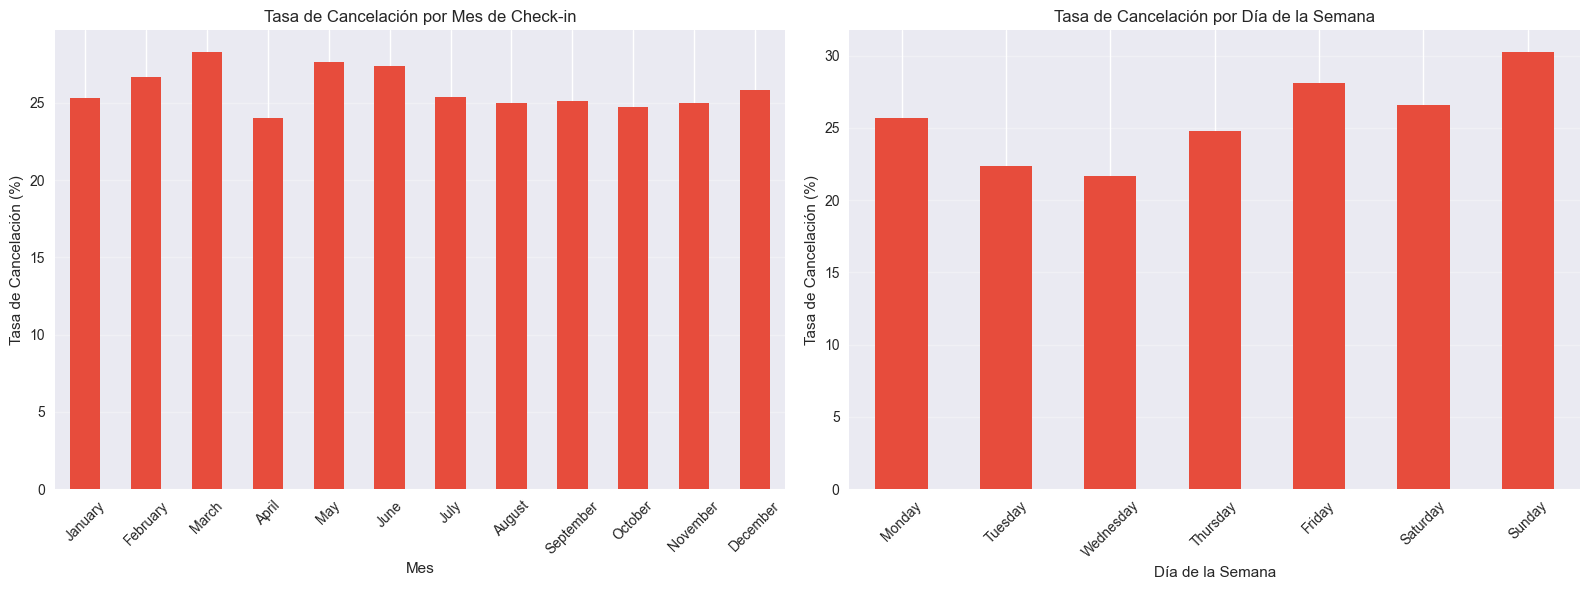

In [15]:
# Gráfico 7: Cancelación por mes y día
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Por mes
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']
month_cancel = pd.crosstab(df['checkin_month'], df['is_cancelled'], normalize='index') * 100
month_cancel = month_cancel.reindex([m for m in month_order if m in month_cancel.index])

month_cancel[True].plot(kind='bar', ax=ax1, color='#e74c3c')
ax1.set_title('Tasa de Cancelación por Mes de Check-in')
ax1.set_ylabel('Tasa de Cancelación (%)')
ax1.set_xlabel('Mes')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Por día de la semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_cancel = pd.crosstab(df['checkin_day'], df['is_cancelled'], normalize='index') * 100
day_cancel = day_cancel.reindex([d for d in day_order if d in day_cancel.index])

day_cancel[True].plot(kind='bar', ax=ax2, color='#e74c3c')
ax2.set_title('Tasa de Cancelación por Día de la Semana')
ax2.set_ylabel('Tasa de Cancelación (%)')
ax2.set_xlabel('Día de la Semana')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

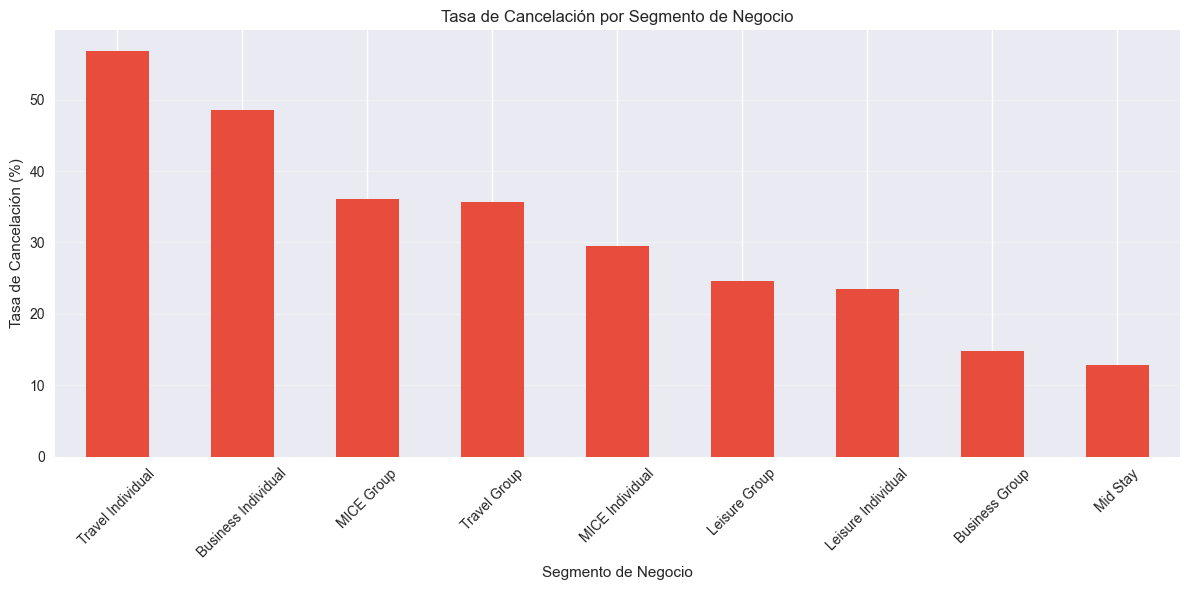

In [16]:
# Gráfico 8: Cancelación por segmento de negocio
plt.figure(figsize=(12, 6))

business_cancel = pd.crosstab(df['business_segment'], df['is_cancelled'], normalize='index') * 100
business_cancel_sorted = business_cancel.sort_values(by=True, ascending=False)

business_cancel_sorted[True].plot(kind='bar', color='#e74c3c')
plt.title('Tasa de Cancelación por Segmento de Negocio')
plt.ylabel('Tasa de Cancelación (%)')
plt.xlabel('Segmento de Negocio')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

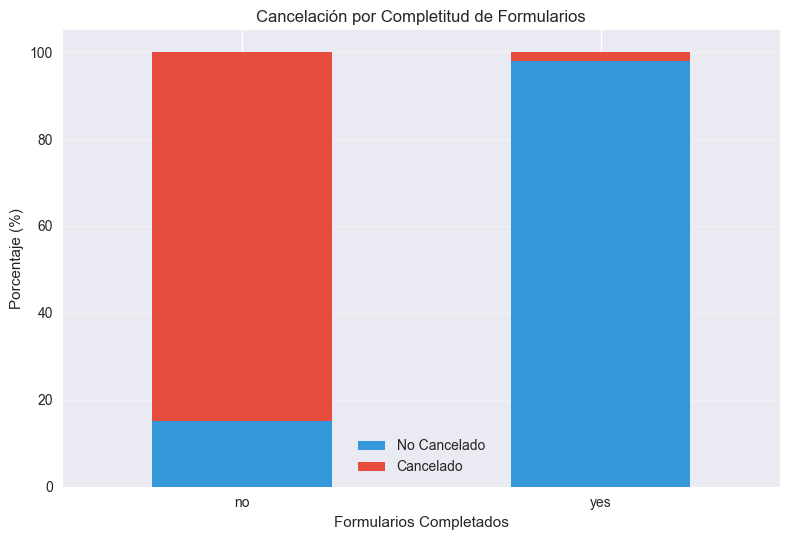

Diferencia en tasa de cancelación (Sí vs No formularios): -82.8%


In [17]:
# Gráfico 9: Formularios completados vs cancelación
plt.figure(figsize=(12, 6))

forms_cancel = pd.crosstab(df['all_entry_forms_completed'], df['is_cancelled'], normalize='index') * 100

forms_cancel.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'])
plt.title('Cancelación por Completitud de Formularios')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Formularios Completados')
plt.legend(['No Cancelado', 'Cancelado'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar diferencia
if 'yes' in forms_cancel.index and 'no' in forms_cancel.index:
    diff = forms_cancel.loc['yes', True] - forms_cancel.loc['no', True]
    print(f"Diferencia en tasa de cancelación (Sí vs No formularios): {diff:.1f}%")

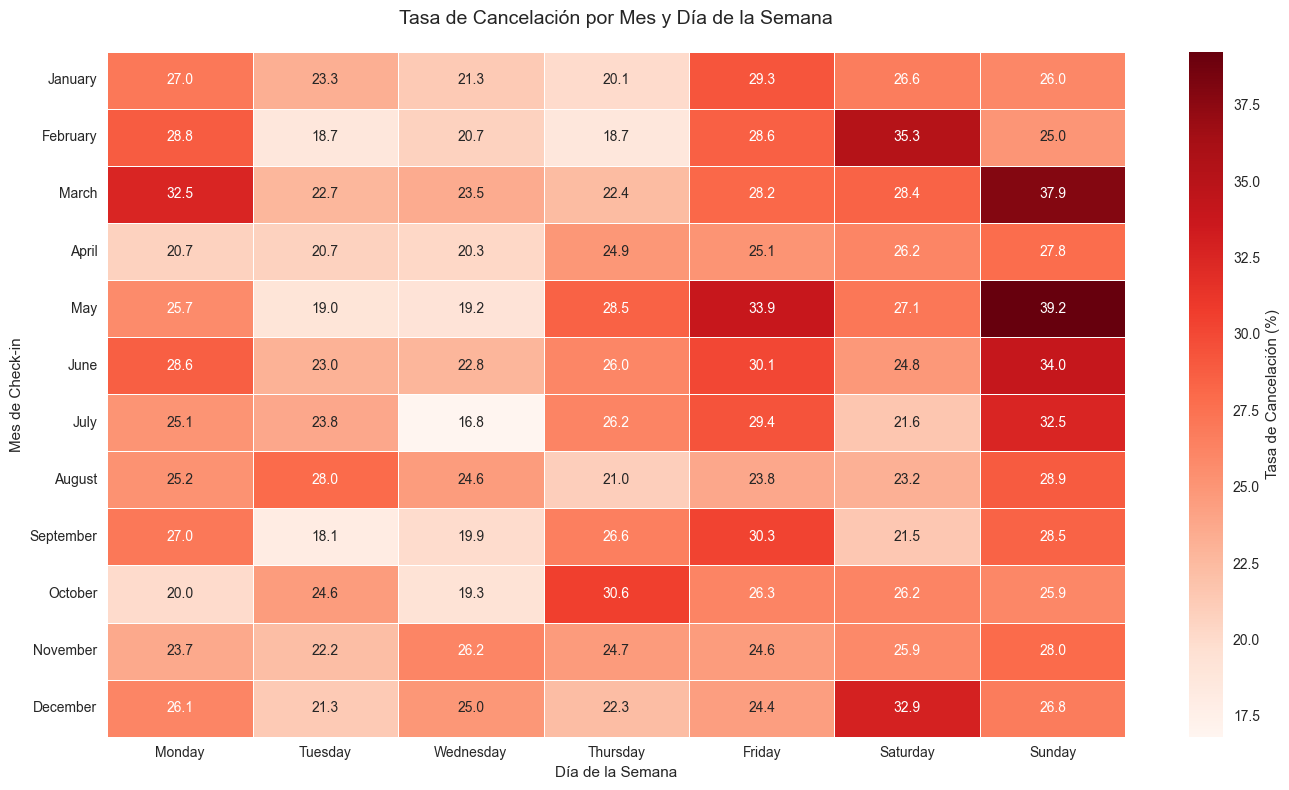

In [18]:
# 10. Heatmap Cancelación por mes y día
plt.figure(figsize=(14, 8))

# Preparar datos para heatmap
heatmap_data = df.groupby(['checkin_month', 'checkin_day'])['is_cancelled'].mean().unstack() * 100

# Ordenar meses y días
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindexar con los meses/días disponibles
available_months = [m for m in month_order if m in heatmap_data.index]
available_days = [d for d in day_order if d in heatmap_data.columns]

heatmap_data = heatmap_data.reindex(index=available_months, columns=available_days)

sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='Reds', 
            cbar_kws={'label': 'Tasa de Cancelación (%)'},
            linewidths=0.5)
plt.title('Tasa de Cancelación por Mes y Día de la Semana', fontsize=14, pad=20)
plt.xlabel('Día de la Semana')
plt.ylabel('Mes de Check-in')
plt.tight_layout()
plt.show()

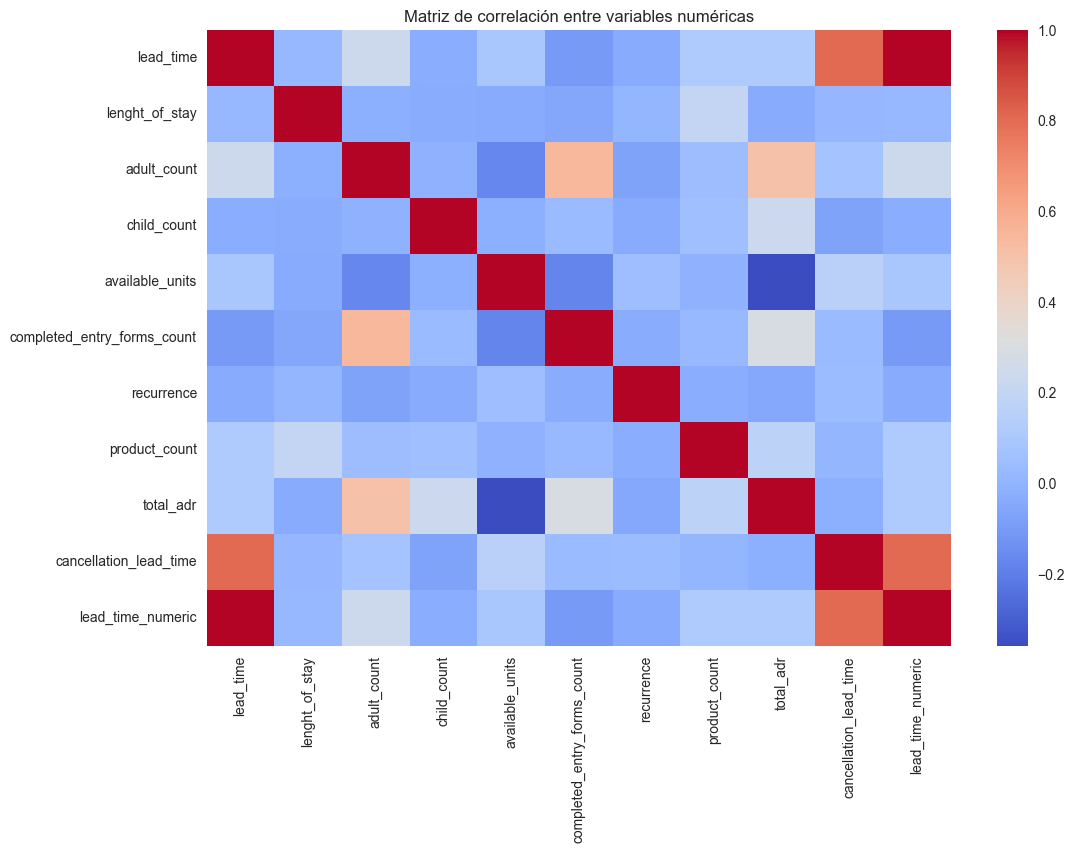

In [19]:
#Matriz de correlación
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

## Año Pasado

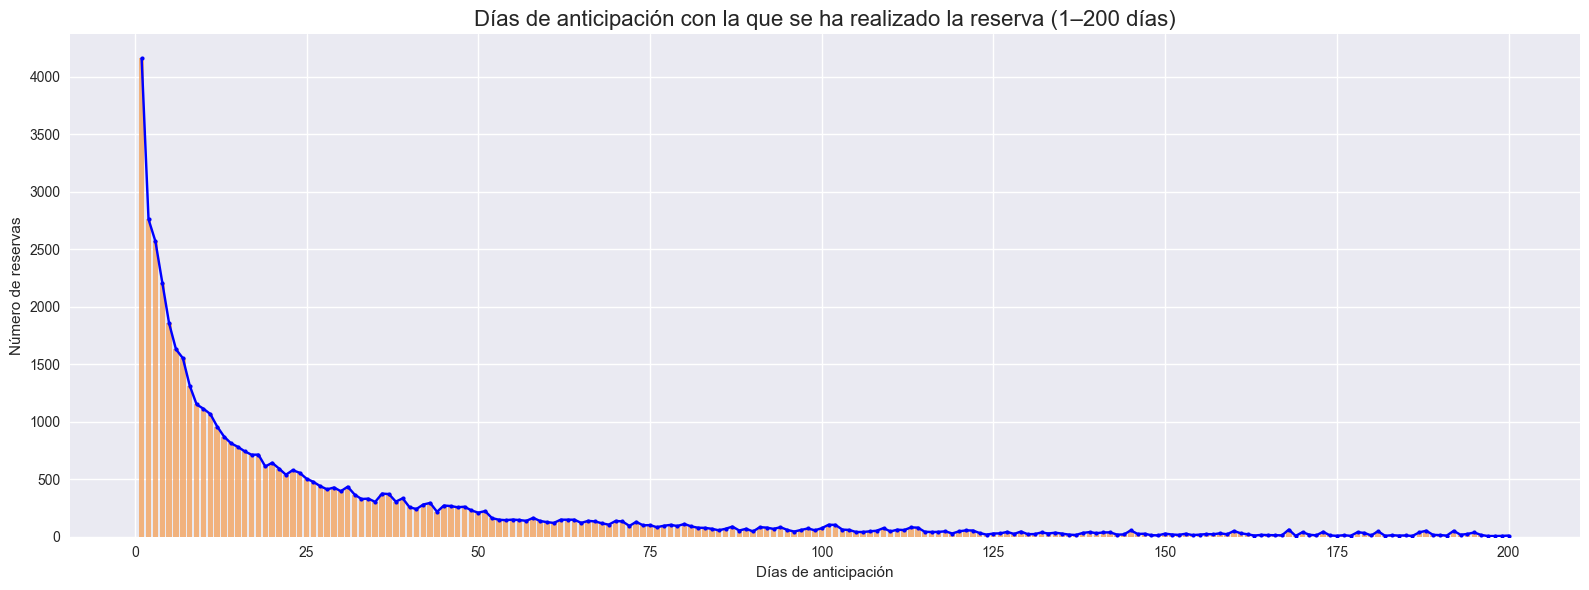

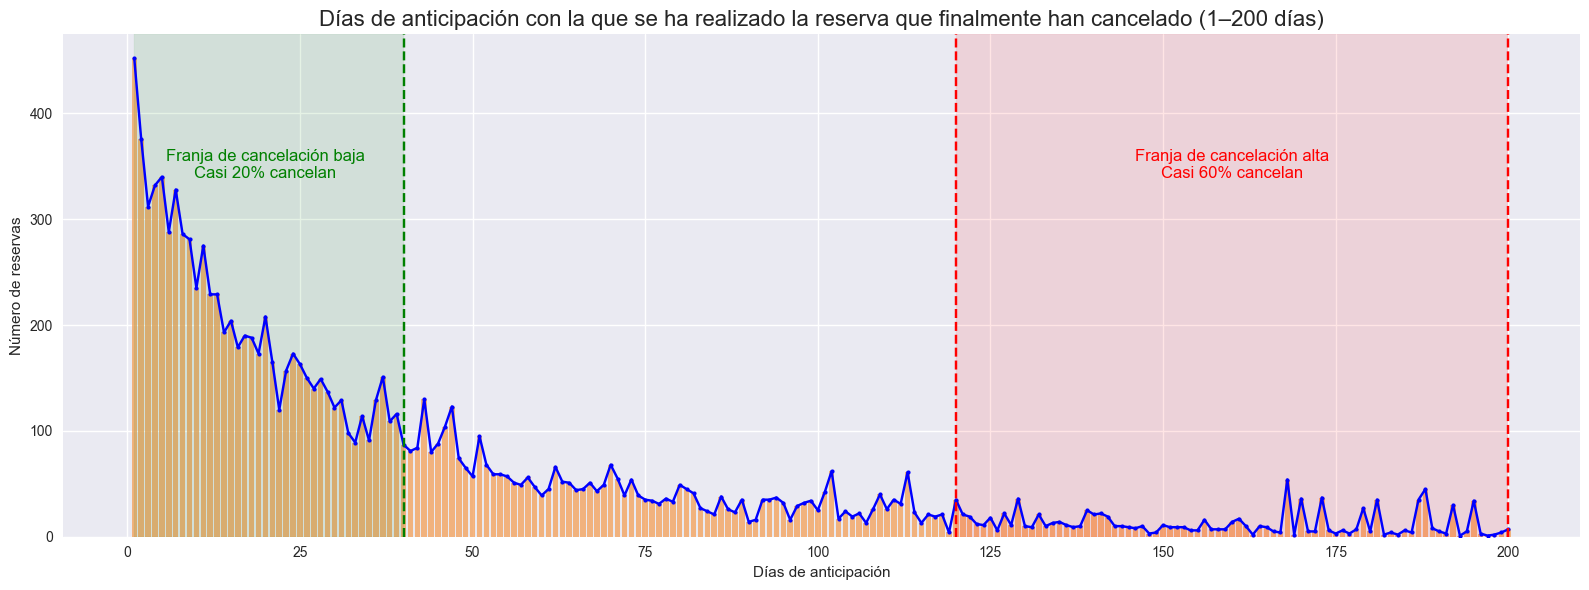

In [20]:
# --- FILTRO: solo de 1 a 200 días ---
df = df[(df["lead_time"] > 0) & (df["lead_time"] <= 200)]

# Asegurar orden ascendente
df = df.sort_values("lead_time")

# Contar reservas por día
reservas = df.groupby("lead_time").size()

# Contar cancelaciones por día
cancelaciones = df[df["is_cancelled"] == 1].groupby("lead_time").size()

# Rellenar días sin valores
cancelaciones = cancelaciones.reindex(reservas.index, fill_value=0)

# ---------------------------------------------------------
# FIGURA 1 — Todas las reservas por días de anticipación
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(16,6))

ax.bar(reservas.index, reservas.values, color="sandybrown", alpha=0.8)
ax.plot(reservas.index, reservas.values, color="blue", marker="o", markersize=3)

ax.set_title("Días de anticipación con la que se ha realizado la reserva (1–200 días)", fontsize=16)
ax.set_xlabel("Días de anticipación")
ax.set_ylabel("Número de reservas")

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# FIGURA 2 — Cancelaciones por días de anticipación
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(16,6))

ax.bar(cancelaciones.index, cancelaciones.values, color="sandybrown", alpha=0.8)
ax.plot(cancelaciones.index, cancelaciones.values, color="blue", marker="o", markersize=3)

ax.set_title("Días de anticipación con la que se ha realizado la reserva que finalmente han cancelado (1–200 días)", fontsize=16)
ax.set_xlabel("Días de anticipación")
ax.set_ylabel("Número de reservas")

# --- Franjas de cancelación ---
# Franja alta: 200–120 días
ax.axvspan(200, 120, color="red", alpha=0.1)
ax.axvline(200, color="red", linestyle="--")
ax.axvline(120, color="red", linestyle="--")
ax.text(160, max(cancelaciones)*0.75,
        "Franja de cancelación alta\nCasi 60% cancelan",
        color="red", fontsize=12, ha="center")

# Franja baja: 40–1 días
ax.axvspan(40, 1, color="green", alpha=0.1)
ax.axvline(40, color="green", linestyle="--")
ax.text(20, max(cancelaciones)*0.75,
        "Franja de cancelación baja\nCasi 20% cancelan",
        color="green", fontsize=12, ha="center")

plt.tight_layout()
plt.show()